In [1]:
matplotlib inline

In [2]:
from numpy import *

In [18]:
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float,curLine))
        dataMat.append(fltLine)
    return dataMat

def distEclud(vecA, vecB):
    """
    计算两个向量的欧式距离
    """
    return sqrt(sum(power(vecA - vecB, 2)))

def randCent(dataSet, k):
    """
    该函数为给定数据集构建一个包含k个随机质心的集合。
    随机质心必须要在整个数据集的边界之内，这可以通过找到数据集每一维的最小和最大值来完成。
    然后生成0到1.0之间的随机数并通过取值范围和最小值，以便确保随机点在数据的边界之内。
    """
    n = shape(dataSet)[1]
    centroids = mat(zeros((k, n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k,1)
    return centroids


In [13]:
datMat = mat(loadDataSet('testSet.txt'))
datMat[:20]

matrix([[ 1.658985,  4.285136],
        [-3.453687,  3.424321],
        [ 4.838138, -1.151539],
        [-5.379713, -3.362104],
        [ 0.972564,  2.924086],
        [-3.567919,  1.531611],
        [ 0.450614, -3.302219],
        [-3.487105, -1.724432],
        [ 2.668759,  1.594842],
        [-3.156485,  3.191137],
        [ 3.165506, -3.999838],
        [-2.786837, -3.099354],
        [ 4.208187,  2.984927],
        [-2.123337,  2.943366],
        [ 0.704199, -0.479481],
        [-0.39237 , -3.963704],
        [ 2.831667,  1.574018],
        [-0.790153,  3.343144],
        [ 2.943496, -3.357075],
        [-3.195883, -2.283926]])

In [15]:
min(datMat[:,0])

matrix([[-5.379713]])

In [16]:
max(datMat[:,1])

matrix([[5.1904]])

In [9]:
max(datMat[:,0])

matrix([[<map object at 0x000001BE57004F98>]], dtype=object)

In [19]:
randCent(datMat, 2)

matrix([[ 2.1211334 ,  5.02873549],
        [-2.4273945 ,  3.08630626]])

In [21]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    """
    K-均值算法
    4个输入参数，只有数据集和簇的数目是必选参数，而用来计算距离和创建初始质心的函数都是可选的
    """
    m = shape(dataSet)[0]  #确定数据集中数据集点的总数
    clusterAssment = mat(zeros((m,2)))  #创建一个矩阵存储每个点的簇分配结果，包含两列：一列记录簇索引值，第二列存储误差
    centroids = createCent(dataSet, k)
    clusterChanged = True  #创建一个标志变量，如果该值为TRUE，则继续迭代
    while clusterChanged:
        clusterChanged = False
        #遍历所有数据找到距离每个点最近的质心
        for i in range(m):
            minDist = inf; minIndex = -1
            #寻找最近的质心
            for j in range(k):
                distJI = distMeas(centroids[j,:], dataSet[i,:])  #每个点遍历质心并计算点到质心的距离
                if distJI< minDist:
                    minDist = distJI; minIndex= j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex, minDist**2
        print(centroids)
        for cent in range(k):
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A == cent)[0]]  #数组过滤获得给定簇的所有点
            centroids[cent,:] = mean(ptsInClust, axis=0)  #沿列方向计算所有点的均值
    return centroids, clusterAssment  #返回所有的类质心与点分配结果

In [22]:
myCentroids, clustAssing = kMeans(datMat, 4)

[[ 0.44475435 -0.83467598]
 [ 4.03188951 -3.17602682]
 [-3.24018062  4.30005296]
 [-2.64151791 -3.39950651]]
[[ 2.25674918  2.17252118]
 [ 3.10080606 -2.87897482]
 [-2.04780157  3.06847276]
 [-3.38237045 -2.9473363 ]]
[[ 2.53499033  2.93781533]
 [ 2.91339042 -2.85004268]
 [-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]]
[[ 2.6265299   3.10868015]
 [ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]]


In [25]:
import matplotlib
import matplotlib.pyplot as plt
def showPlt(datMat, alg=kMeans, numClust=4):
    myCentroids, clustAssing = alg(datMat, numClust)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

[[-1.30552153  0.92752796]
 [ 4.00900356 -1.01511906]
 [ 0.69039733 -1.37158665]
 [-3.04194511 -2.03318018]]
[[-0.98480253  3.04155573]
 [ 3.40634517 -0.41413626]
 [ 1.27051487 -2.7993025 ]
 [-3.53973889 -2.89384326]]
[[-0.83070823  3.10911097]
 [ 3.64697677  1.17210846]
 [ 2.19454347 -3.07604306]
 [-3.53973889 -2.89384326]]
[[-1.6334182   3.03655888]
 [ 3.13799847  2.35490324]
 [ 2.44502437 -2.980011  ]
 [-3.53973889 -2.89384326]]
[[-2.46154315  2.78737555]
 [ 2.6265299   3.10868015]
 [ 2.65077367 -2.79019029]
 [-3.53973889 -2.89384326]]


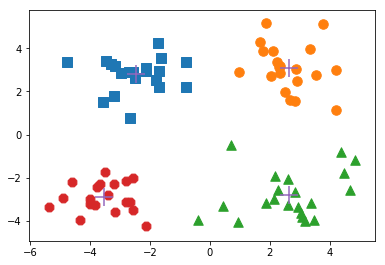

In [26]:
showPlt(datMat)

### 二分K-均值算法的伪代码：
* 将所有点看成一个簇
* 当簇数目小于k时
* &ensp;对于每一个簇
* &ensp;&ensp;计算总误差
* &ensp;&ensp;在给定的簇上面进行K-均值聚类(k=2)
* &ensp;&ensp;计算将该簇一分为二之后的总误差
* 选择使得误差最小的那个簇进行划分操作


In [43]:
def biKmeans(dataSet, k, distMeas=distEclud):
    """
    
    """
    m = shape(dataSet)[0] 
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]  #计算整个数据集的质心
    centList = [centroid0] #使用列表保留所有质心
    for j in range(m):
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2  #计算每个点到质心的误差值
    while(len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:] #将该簇clusterAssment中的所有点看成一个小的数据集ptsInCurrCluster
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas) #输入到kMeans中进行处理
            sseSplit = sum(splitClustAss[:,1])
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("sseSplit, and notSplit:", sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList)  #更新簇的分配结果
        bestClustAss[nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit
        print("the bestCentToSplit is:", bestCentToSplit)
        print("the len of bestClustAss is:", len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:] = bestClustAss
    return mat(centList), clusterAssment

In [28]:
datMat3 = mat(loadDataSet('testSet2.txt'))

In [44]:
centList,myNewAssments=biKmeans(datMat3,3)

[[-2.66783642 -0.73551906]
 [-3.95064563 -0.03514288]]
[[ 1.19084544  0.24642754]
 [-3.06779095  3.33769884]]
[[ 1.23710375  0.17480612]
 [-2.94737575  3.3263781 ]]
sseSplit, and notSplit: 570.7227574246755 0.0
the bestCentToSplit is: 0
the len of bestClustAss is: 60
[[ 1.28841851 -0.78042109]
 [ 3.2250104   3.16526052]]
[[-0.32150057 -2.62473743]
 [ 2.95977168  3.26903847]]
[[-0.45965615 -2.7782156 ]
 [ 2.93386365  3.12782785]]
sseSplit, and notSplit: 68.68654812621844 38.06295063565756
[[-2.81447176  3.45611821]
 [-3.755917    3.8839507 ]]
[[-2.56458833  2.9616746 ]
 [-4.095738    4.4204886 ]]
sseSplit, and notSplit: 21.290859679422137 532.6598067890178
the bestCentToSplit is: 0
the len of bestClustAss is: 40


[[ 0.60024601 -1.4358572 ]
 [ 2.70466448  0.84988766]]
[[-1.63278555 -0.45973485]
 [ 1.64513178  3.28485396]]
sseSplit, and notSplit: 568.8344450152321 0.0
the bestCentToSplit is: 0
the len of bestClustAss is: 60
[[-4.42287254  1.16193519]
 [-3.10669388  0.50896004]]
[[-3.57584627  3.29672555]
 [-0.66125518 -2.33796505]]
[[-3.4376      3.10715862]
 [-0.45965615 -2.7782156 ]]
sseSplit, and notSplit: 47.90360812456244 178.15803084505163
[[-1.41840106  3.44732703]
 [ 2.58529804  3.68798948]]
[[-2.03695929  3.7335    ]
 [ 2.93386365  3.12782785]]
sseSplit, and notSplit: 48.134745007598525 390.67641417018046
the bestCentToSplit is: 0
the len of bestClustAss is: 33
[[-3.78262608  1.3637208 ]
 [-4.07315097  1.80211551]]
[[-3.08895133  1.818063  ]
 [-3.5421946   3.4938873 ]]
[[-3.15282975  2.0144255 ]
 [-3.56416456  3.59281778]]
[[-3.1064576   2.1950374 ]
 [-3.644564    3.67723438]]
[[-3.16218625  2.44942162]
 [-3.878262    4.1595378 ]]
sseSplit, and notSplit: 8.170168490484176 207.31528028917

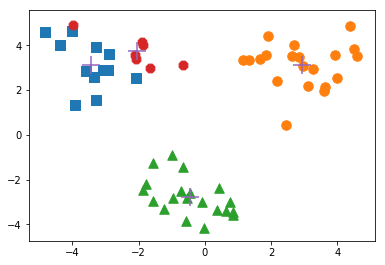

In [51]:
showPlt(datMat3, alg=biKmeans)

[[-2.24869657  0.08635711]
 [ 3.47852242  0.69714622]
 [-3.98372253 -1.99819146]
 [ 1.34983213  0.00467145]]
[[-2.53736196  2.3051814 ]
 [ 3.1222835   3.1029245 ]
 [-1.3335335  -2.9409665 ]
 [ 0.52461655 -2.02877909]]
[[-2.94737575  3.3263781 ]
 [ 2.93386365  3.12782785]
 [-1.02964518 -2.81778218]
 [ 0.23699711 -2.72985644]]
[[-2.94737575  3.3263781 ]
 [ 2.93386365  3.12782785]
 [-1.07894467 -2.43015258]
 [ 0.46927663 -3.30031012]]
[[-2.94737575  3.3263781 ]
 [ 2.93386365  3.12782785]
 [-1.12616164 -2.30193564]
 [ 0.35496167 -3.36033556]]


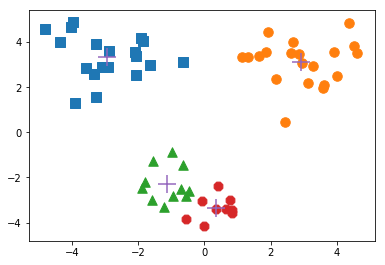

In [48]:
showPlt(datMat3)

[[ 3.56293842  0.22135469]
 [-3.30712607 -1.09580505]]
[[ 2.77278464  0.27809051]
 [-2.83969898 -0.15857156]]
[[ 2.71473038  0.18858278]
 [-2.9219568  -0.07998038]]
sseSplit, and notSplit: 828.6926539968681 0.0
the bestCentToSplit is: 0
the len of bestClustAss is: 80
[[ 2.95413041 -1.49025976]
 [ 3.99140746  4.27071795]]
[[ 2.8692781  -2.54779119]
 [ 2.54391447  3.21299611]]
[[ 2.80293085 -2.7315146 ]
 [ 2.6265299   3.10868015]]
sseSplit, and notSplit: 87.30471264989171 399.99802121609173
[[-0.83794247  1.17355716]
 [-4.52363279 -2.6747518 ]]
[[-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]]
sseSplit, and notSplit: 62.64959202653465 428.6946327807764
the bestCentToSplit is: 0
the len of bestClustAss is: 40
[[ 0.97340904 -2.02019109]
 [ 4.48014774 -2.86467155]]
[[ 1.64368312 -2.5606355 ]
 [ 3.57576267 -2.845434  ]]
sseSplit, and notSplit: 32.678827295007544 436.3165071745162
[[-4.03793153  0.21936885]
 [-5.18872608 -2.14820807]]
[[-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]

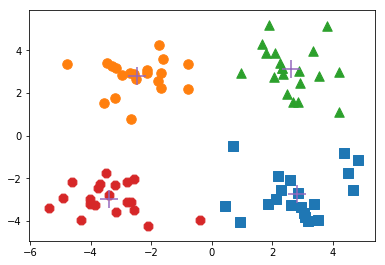

In [50]:
showPlt(datMat,alg=biKmeans)

In [60]:
import urllib
import json
from time import sleep

def geoGrab(stAddress, city):
    apiStem = 'http://where.yahooaps.com/geocode?'
    params = {}
    params['flags'] = 'J'
    params['appid'] = 'ppp68N8t'
    params['location'] = '%s %s' % (stAddress, city)
    url_params = urllib.parse.urlencode(params)
    yahooApi = apiStem + url_params
    print("yahooApi")
    c=urllib.request.urlopen(yahooApi)
    return json.loads(c.read())

def massPlaceFind(fileName):
    fw = open('places.txt','w')
    for lin in open(fileName).readlines():
        line = line.strip()
        lineArr = line.split('\t')
        retDict = geoGrab(lineArr[1], lineArr[2])
        if retDict['ResultSet']['Error'] == 0:
            lat = float(retDict['ResultSet']['Results'][0]['latitude'])
            lng = float(retDict['ResultSet']['Results'][0]['longitude'])
            print("%s\t%f\t%f" % (lineArr[0], lat, lng))
            fw.write('%s\t%f\t%f\n' % (line, lat, lng))
        else:
            print("error fetching")
        sleep(1)
    fw.close()

In [62]:
#geoResults = geoGrab('1 VA Center', 'Augusta ME')

In [67]:
def distSLC(vecA, vecB):
    """
    返回地球表面两点间的距离
    """
    a = sin(vecA[0,1]*pi/180) * sin(vecB[0,1] * pi/180)
    b = cos(vecA[0,1]*pi/180) * cos(vecB[0,1] * pi/180) * cos(pi *(vecB[0,0]- vecA[0,0])/180)
    return arccos(a + b)*6371.0

import matplotlib
import matplotlib.pyplot as plt
def clusterClubs(numClust=5):
    """
    该函数将文本文件的解析、聚类、画图封装在一起
    
    """
    datList = []
    for line in open('places.txt').readlines():
        lineArr = line.split('\t')
        datList.append([float(lineArr[4]), float(lineArr[3])])
    datMat = mat(datList)
    myCentroids, clustAssing = biKmeans(datMat, numClust, distMeas=distSLC)
    fig = plt.figure()
    rect=[0.1, 0.1, 0.8, 0.8]
    scatterMarkers=['s','o','^','8','p','d','v','h','>','<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    imgP = plt.imread('Portland.png')  #基于一副图来创建矩阵
    ax0.imshow(imgP)
    ax1= fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A ==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0],ptsInCurrCluster[:,1].flatten().A[0],marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0],myCentroids[:,1].flatten().A[0], marker='+', s= 300)
    plt.show()

[[-122.42057685   45.6115069 ]
 [-122.64945671   45.57723126]]
[[-122.4568086    45.4961344 ]
 [-122.64533773   45.51357016]]
[[-122.50322869   45.50324862]
 [-122.66149437   45.51440946]]
[[-122.52363268   45.50792237]
 [-122.67273274   45.51397274]]
[[-122.54222807   45.51911044]
 [-122.68917857   45.50793286]]
[[-122.54868607   45.51882187]
 [-122.69551477   45.50729503]]
sseSplit, and notSplit: 3043.263316150597 0.0
the bestCentToSplit is: 0
the len of bestClustAss is: 69
[[-122.51316801   45.46452776]
 [-122.56007938   45.48250305]]
[[-122.4568086    45.4961344 ]
 [-122.56706156   45.52335936]]
sseSplit, and notSplit: 505.6196082286877 2191.824427550861
[[-122.75055308   45.578742  ]
 [-122.776918     45.55718266]]
[[-122.67668873   45.541569  ]
 [-122.71987788   45.46294047]]
[[-122.67593313   45.53983057]
 [-122.72366337   45.46052519]]
[[-122.67471037   45.53756246]
 [-122.7288018    45.45886713]]
sseSplit, and notSplit: 1321.044632394249 851.4388885997361
the bestCentToSplit i

E:\install\Anaconda3\lib\site-packages\numpy\matrixlib\defmatrix.py:536: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
E:\install\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


[[         nan          nan]
 [-122.4009285   45.46897  ]]
sseSplit, and notSplit: 44.31665633151624 1778.0567643191885
the bestCentToSplit is: 1
the len of bestClustAss is: 24


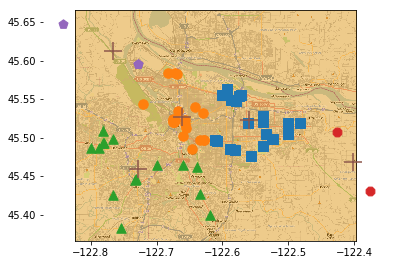

In [69]:
clusterClubs(5)